# 1D 1 Comp GMM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import corner as corner

In [2]:
%matplotlib notebook

### Data simulation

<IPython.core.display.Javascript object>


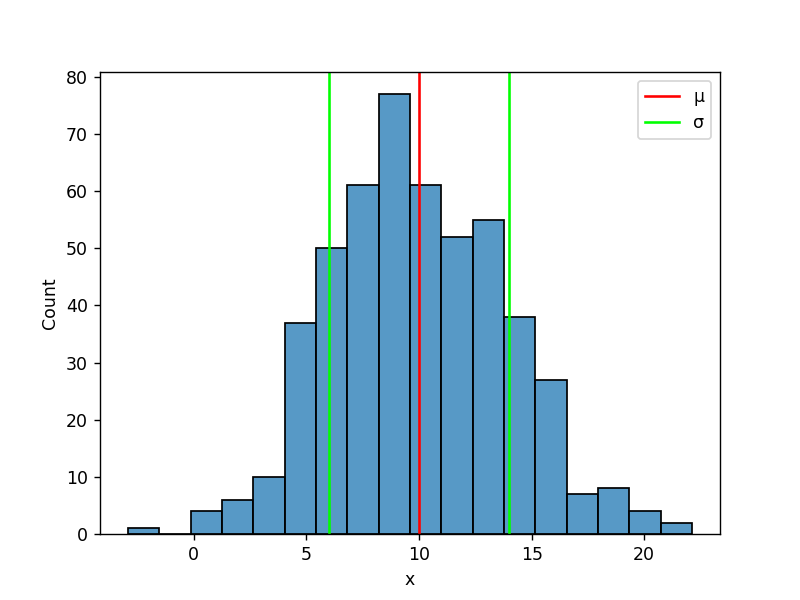

In [3]:
set_seed = False
if set_seed:
    np.random.seed(923114)

N = 500
μ, σ = 10, 4
data = norm.rvs(size=N, loc=μ, scale=σ)

plt.figure()
ax = sns.histplot(data)
plt.ylabel('Count')
plt.xlabel('x')
ax.axvline(μ, color='r', label='μ')
ax.axvline(μ+σ, color='lime', label='σ')
ax.axvline(μ-σ, color='lime')
ax.legend()

In [4]:
def model(x, p):
    #Insert stuff
    return p

def log_likelihood(p, x, prior_check=1):
    p = model(x, p)
    μ, σ = p
    log_norm = norm.logpdf(x, loc=μ, scale=σ)
    total = np.sum(log_norm)*prior_check
    return total

ntrials = 500
μ_guess = np.linspace(8, 12, ntrials)
σ_guess = np.linspace(2, 6, ntrials)

mapping = np.empty((ntrials, ntrials))
current_max = -np.inf
for i, mean in enumerate(μ_guess):
    for j, std in enumerate(σ_guess):
        logl = log_likelihood((mean, std), data)
        mapping[i, j] = logl
        if logl > current_max:
            current_max = logl
            best_mean = mean
            best_std = std

<IPython.core.display.Javascript object>


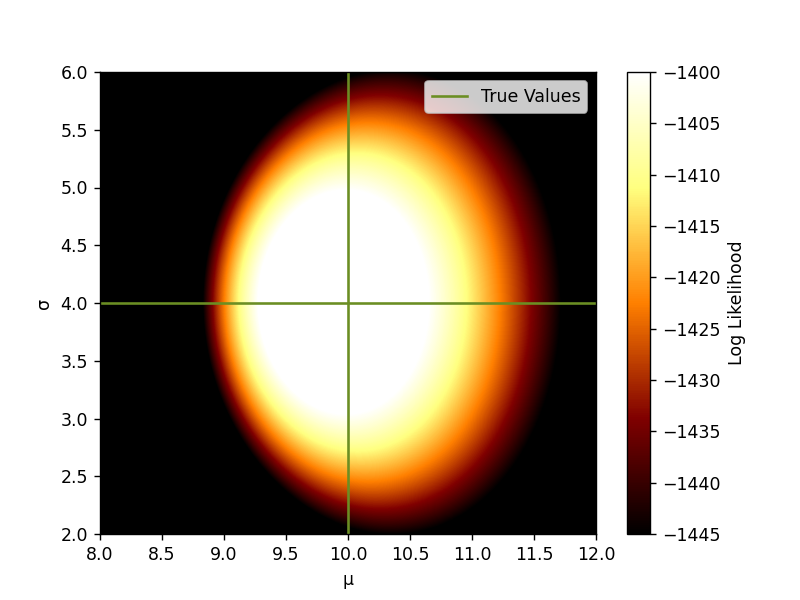

The best fit values are: μ = 9.995991983967937 and σ = 3.8597194388777556


In [5]:
plt.figure()
plt.imshow(mapping, cmap='afmhot', extent=[μ_guess[0], μ_guess[-1], σ_guess[0], σ_guess[-1]]
           , aspect='auto', vmax=-1400, vmin=-1445)
plt.colorbar(label='Log Likelihood')
plt.xlabel('μ')
plt.ylabel('σ')
plt.axvline(μ, color='olivedrab', label='True Values')
plt.axhline(σ, color='olivedrab')
plt.legend()
plt.show()

print(f'The best fit values are: μ = {best_mean} and σ = {best_std}')

In [6]:
from dynesty import NestedSampler

ndim = 2

def unit_transform(u, centre, span):
    return 2*span*u + centre-span

def prior_transform(u):
    x = np.array(u)
    
    x[0] = unit_transform(x[0], 10, 2)
    x[1] = unit_transform(x[1], 4, 2)
    return x

sampler = NestedSampler(log_likelihood, prior_transform, ndim, logl_args=[data, 1e-6], nlive=2000)
sampler.run_nested()

z = sampler.results
prior = z.samples_equal()

289it [00:00, 979.69it/s, +2000 | bound: 0 | nc: 1 | ncall: 4310 | eff(%): 99.091 | loglstar:   -inf < -0.001 <    inf | logz: -0.002 +/-    nan | dlogz:  0.000 >  2.009]


<IPython.core.display.Javascript object>


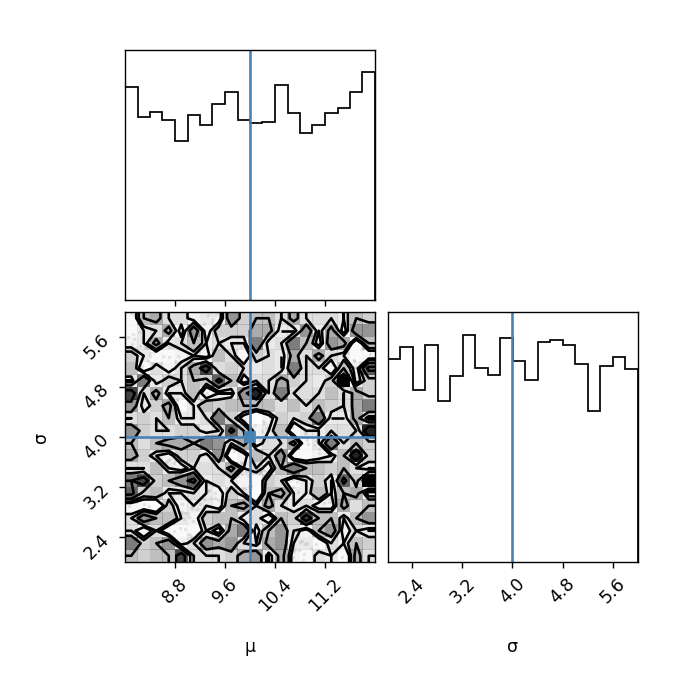

In [7]:
corner.corner(prior, labels=['μ', 'σ'], truths=[μ, σ]);

<IPython.core.display.Javascript object>


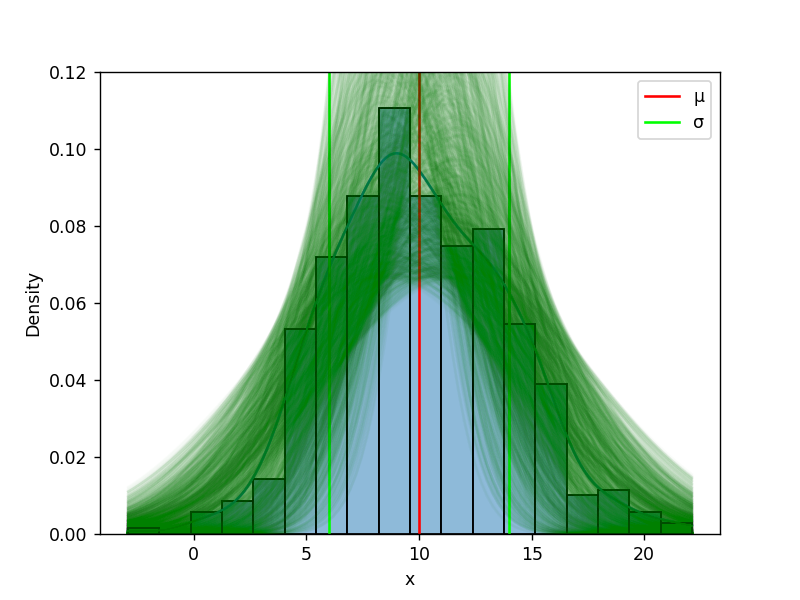

In [8]:
plt.figure()
ax = sns.histplot(data, kde=True, stat='density')
plt.ylabel('Density')
plt.xlabel('x')
ax.axvline(μ, color='r', label='μ')
ax.axvline(μ+σ, color='lime', label='σ')
ax.axvline(μ-σ, color='lime')
ax.set_ylim([0, 0.12])
ax.legend()

prior_p = np.linspace(min(data), max(data), 100)

for p in prior:
    ax.plot(prior_p, norm.pdf(prior_p, p[0], p[1]), c='g', alpha=0.02)

In [9]:
sampler = NestedSampler(log_likelihood, prior_transform, ndim, logl_args=[data], nlive=2000)
sampler.run_nested()

z = sampler.results
posterior = z.samples_equal()

8680it [00:13, 645.54it/s, +2000 | bound: 1 | nc: 1 | ncall: 74705 | eff(%): 14.689 | loglstar:   -inf < -1384.716 <    inf | logz: -1389.455 +/-  0.044 | dlogz:  0.001 >  2.009]


<IPython.core.display.Javascript object>


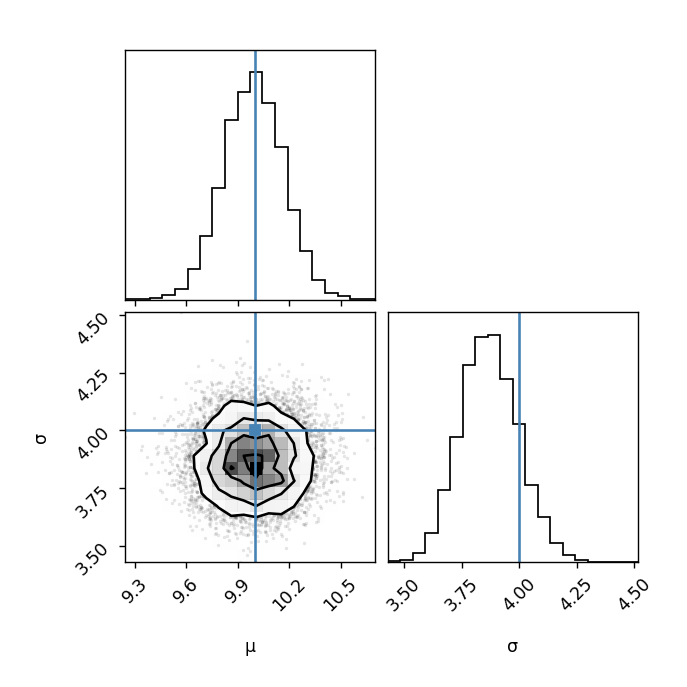

In [10]:
corner.corner(posterior, labels=['μ', 'σ'], truths=[μ, σ]);

<IPython.core.display.Javascript object>


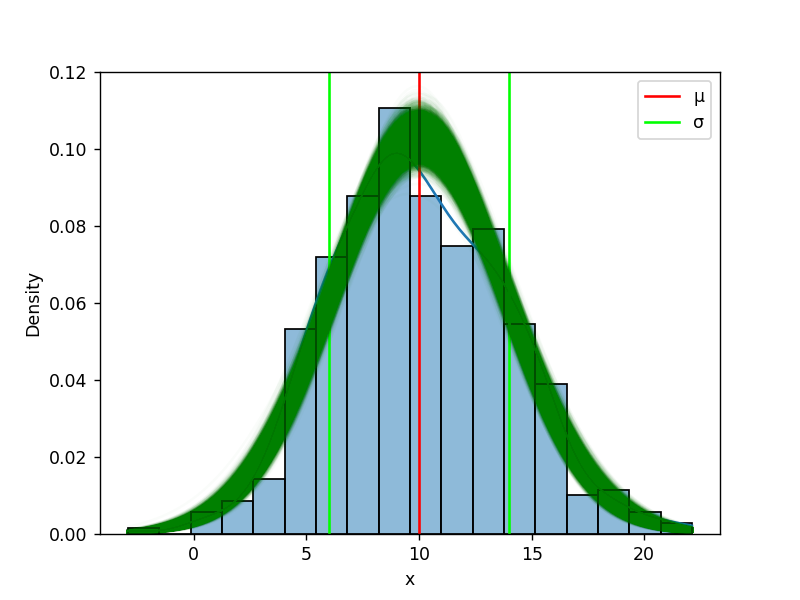

In [12]:
plt.figure()
ax = sns.histplot(data, kde=True, stat='density')
plt.ylabel('Density')
plt.xlabel('x')
ax.axvline(μ, color='r', label='μ')
ax.axvline(μ+σ, color='lime', label='σ')
ax.axvline(μ-σ, color='lime')
ax.set_ylim([0, 0.12])
ax.legend()

posterior_p = np.linspace(min(data), max(data), 100)

for p in posterior:
    ax.plot(posterior_p, norm.pdf(posterior_p, p[0], p[1]), c='g', alpha=0.02)